In [56]:
import glob
import io
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

from PIL import Image
from tqdm import tqdm

In [57]:
TFRECORD_DIR = '../../data/tfrecord/'

# If the repo / data is organize correctly this shoult exists
assert os.path.exists(TFRECORD_DIR)

In [58]:
tfrecords_filenames = glob.glob(os.path.join(TFRECORD_DIR, 'train-*.tfrecord'))
print(len(tfrecords_filenames))

10


Image ID : 2776642e1


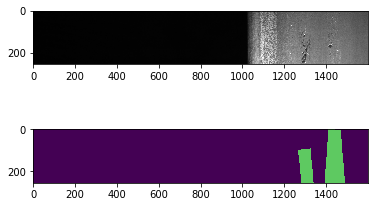

Image ID : a2b2c9e3e


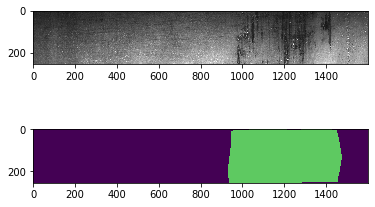

In [62]:
tfrecords_filename = tfrecords_filenames[0]
record_iterator = tf.python_io.tf_record_iterator(path=tfrecords_filename)
count = 0

for string_record in record_iterator:
    example = tf.train.Example()
    example.ParseFromString(string_record)
    features = example.features.feature
    
    filename = str(features['image/filename'].bytes_list.value[0])
    image_id = filename.split('/')[-1].split('.')[0]

    height = features['image/height'].int64_list.value[0]
    width = features['image/width'].int64_list.value[0]
    channels = features['image/channels'].int64_list.value[0]
#   print("Image dimensions : {} x {} x {}".format(height, width, channels))

    image_encoded = example.features.feature['image/encoded'].bytes_list.value[0]
    image = np.array(Image.open(io.BytesIO(image_encoded)))
    
    mask_encoded = example.features.feature['image/segmentation/class/encoded'].bytes_list.value[0]
    mask = np.array(Image.open(io.BytesIO(mask_encoded)))
    
    if len(set(mask.flatten())) > 1:
        print("Image ID : {}".format(image_id))
        plt.subplot(2, 1, 1)
        plt.imshow(image)
        plt.subplot(2, 1, 2)
        plt.imshow(mask, vmin=0, vmax=4)
        plt.show()
        count += 1
        
    if count == 2:
        break